# Pegasos SVM implementations from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.datasets.samples_generator import make_blobs

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Pegasos algorithm

### Make synthetic dataset

We will make a synthetic dataset using scikit-learn to ensure we have a decent dataset to work with. SVMs is about finding the best hyperplane that separates data. We see below that there are a possible hyperplanes - but how do we find the best hyperplane. We need to find the best hyperplane such that we maximise the margins.

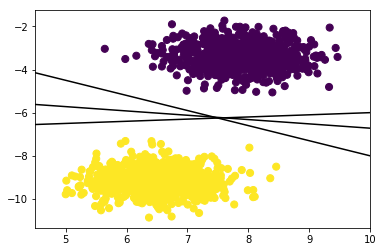

In [2]:
X, y = make_blobs(
    n_samples=1500,
    centers=2,
    random_state=6,
    cluster_std=0.6
)
y = y[:, None]
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=50);

xfit = np.linspace(4.5, 10)

for m, b in [(-0.7, -1), (-0.2, -4.72), (0.1, -7)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(4.5, 10);

### Setup

We set up our loss function, and initialize our parameters. There are many different ways to optimize SVMs such as primal/dual optimization. These can be solved using quadtratic programming methods. However, we can also use gradient descent to solve this. Typically we have a loss function that is not differential in Hinge Loss. But we can turn this problem into a sub-gradient descent and solve using gradient descent.

In [3]:
X = np.hstack([X, np.ones((X.shape[0], 1))])

In [4]:
y = np.where(y == 0, -1, y)

Split into train test set

In [5]:
train_idxs = np.random.choice(X.shape[0], 1000)
test_idxs = np.setdiff1d(np.arange(X.shape[0]), train_idxs)
X_tr = X[train_idxs]
y_tr = y[train_idxs]
X_te = X[test_idxs]
y_te = y[test_idxs]

Helper functions

In [6]:
def predict(X, w):
    return np.dot(X, w)

def svm_preds(y_preds):
    return np.where(y_preds >= 0, 1, -1)

def accuracy(y, y_preds):
    return (y == y_preds).sum() / y.shape[0]

### Train binary SVM

In [11]:
n_samples = X_tr.shape[0]
w = np.zeros((X_tr.shape[1],1)) # n_features x n_classes
batch_size = 1
lam = 0.01
losses = []
train_accs = []
test_accs = []
epochs = 100
for epoch in range(1, epochs+1):
    # Select random batch
    batch_idxs = np.random.choice(n_samples, batch_size, replace=False)
    X_s = X_tr[batch_idxs]
    y_s = y_tr[batch_idxs]
    lr = 1 / (lam * epoch)
    # Predict
    score = predict(X_s, w)
    # Calculate loss
    loss = np.maximum(0, 1 - y_s * score)
    train_preds = svm_preds(predict(X_tr, w))
    train_acc = accuracy(y_tr, train_preds)
    test_preds = svm_preds(predict(X_te, w))
    test_acc = accuracy(y_te, test_preds)
    # Calculate gradient
    dW = 0 if loss == 0 else (y_s * X_s).T
    # Update rule
    w = ((1 - (lr * lam)) * w) + lr * dW
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    if epoch % 10 == 0:
        print(f"epoch={epoch}/{epochs}, train_acc={train_acc:.4f}, test_acc={test_acc:.4f}")
    losses.append(loss.flatten())

epoch=10/100, train_acc=0.9890, test_acc=0.9822
epoch=20/100, train_acc=0.9990, test_acc=1.0000
epoch=30/100, train_acc=0.9990, test_acc=1.0000
epoch=40/100, train_acc=0.9990, test_acc=1.0000
epoch=50/100, train_acc=0.9990, test_acc=1.0000
epoch=60/100, train_acc=0.9990, test_acc=1.0000
epoch=70/100, train_acc=0.9990, test_acc=1.0000
epoch=80/100, train_acc=0.9990, test_acc=1.0000
epoch=90/100, train_acc=0.9990, test_acc=1.0000
epoch=100/100, train_acc=0.9990, test_acc=1.0000


In [12]:
train_preds = svm_preds(predict(X_tr, w))
test_preds = svm_preds(predict(X_te, w))

In [13]:
print(accuracy(y_tr, train_preds))
print(accuracy(y_te, test_preds))

0.999
1.0


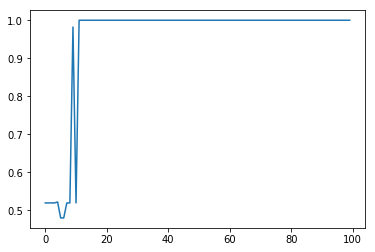

In [14]:
plt.plot(test_accs)

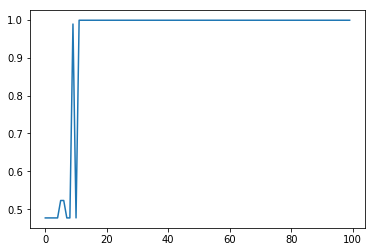

In [15]:
plt.plot(train_accs)